Imports

In [36]:
import matplotlib

font = {'size': 16}

matplotlib.rc('font', **font)

In [37]:
import os

import matplotlib.pyplot as plt
import numpy as np

from c3.experiment import Experiment
from playground.utils import calc_exp_fid

SPARSE solutions are robust

In [38]:
sparse_cx_exp = Experiment()
sparse_cx_exp.read_config(os.path.join('plots_exps', 'cx_45ns_ftgu_d1_hann_d2_hann.hjson'))

pwc_cx_exp = Experiment()
pwc_cx_exp.read_config(os.path.join('plots_exps', 'cx_pwc.hjson'))

#TODO add frequency basis

C:\Users\Yonatan Gideoni\Desktop\ML4Q\c3\c3\signal\gates.py:128: UserWarning: No ideal gate found for gate:  . Use set_ideal() explicitly.
  warnings.warn(
C:\Users\Yonatan Gideoni\Desktop\ML4Q\c3\c3\signal\gates.py:128: UserWarning: No ideal gate found for gate: cnot. Use set_ideal() explicitly.
  warnings.warn(


In [39]:
def fid_for_delta_freq(exp: Experiment, delta_freq: float, qubit: int) -> float:
    freq = exp.pmap.model.subsystems[f'Q{qubit}'].params['freq']
    freq.set_value(freq.numpy() + delta_freq, extend_bounds=True)
    exp.pmap.model.update_model()

    exp.compute_propagators()
    fid = calc_exp_fid(exp)

    freq.set_value(freq.numpy() - delta_freq, extend_bounds=True)
    exp.pmap.model.update_model()

    return fid


def fid_for_delta_anharm(exp: Experiment, delta_anharm: float, qubit: int) -> float:
    anhar = exp.pmap.model.subsystems[f'Q{qubit}'].params['anhar']
    anhar.set_value(anhar.numpy() + delta_anharm, extend_bounds=True)
    exp.pmap.model.update_model()

    exp.compute_propagators()
    fid = calc_exp_fid(exp)

    anhar.set_value(anhar.numpy() - delta_anharm, extend_bounds=True)
    exp.pmap.model.update_model()

    return fid

In [40]:
n_dfreqs = 25
dfreqs = np.linspace(0, 3e6, num=n_dfreqs)

In [41]:
sparse_freq_fids_t = np.array([fid_for_delta_freq(sparse_cx_exp, dfreq, qubit=2) for dfreq in dfreqs])
pwc_freq_fids_t = np.array([fid_for_delta_freq(pwc_cx_exp, dfreq, qubit=2) for dfreq in dfreqs])

sparse_freq_fids_c = np.array([fid_for_delta_freq(sparse_cx_exp, dfreq, qubit=1) for dfreq in dfreqs])
pwc_freq_fids_c = np.array([fid_for_delta_freq(pwc_cx_exp, dfreq, qubit=1) for dfreq in dfreqs])

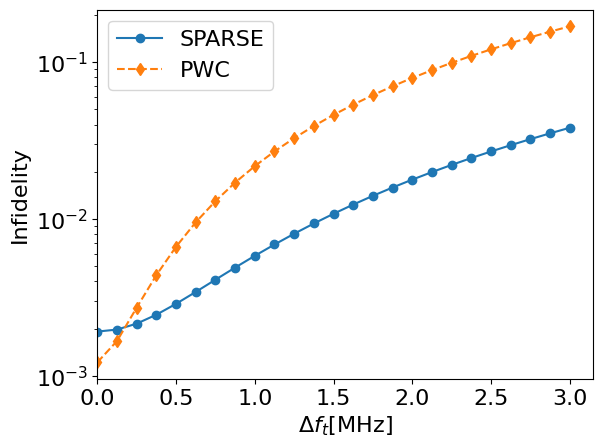

In [42]:
plt.plot(dfreqs / 1e6, 1 - sparse_freq_fids_t, linestyle='solid', label='SPARSE', marker='o')
plt.plot(dfreqs / 1e6, 1 - pwc_freq_fids_t, linestyle='dashed', marker='d', label='PWC')

plt.legend()
plt.xlim(0)
plt.semilogy()
plt.xlabel('$\Delta f_t$[MHz]')
plt.ylabel('Infidelity')
plt.savefig('perturbed_freq_t_fid.png', bbox_inches='tight', dpi=500)

For the anharmonicity:

In [43]:
n_dfreqs = 25
dfreqs = np.linspace(0, 10e6, num=n_dfreqs)

In [44]:
sparse_anhar_fids_t = np.array([fid_for_delta_anharm(sparse_cx_exp, dfreq, qubit=2) for dfreq in dfreqs])
pwc_anhar_fids_t = np.array([fid_for_delta_anharm(pwc_cx_exp, dfreq, qubit=2) for dfreq in dfreqs])

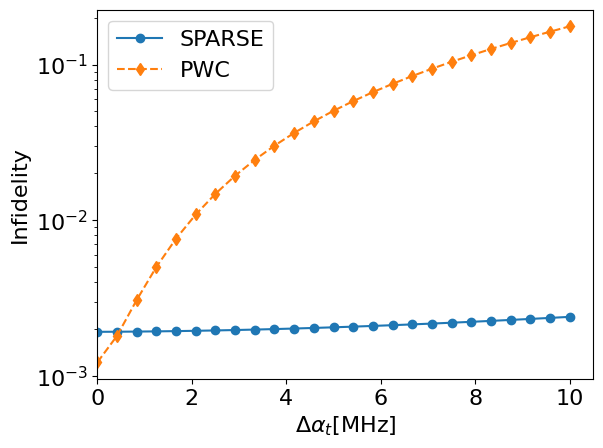

In [45]:
plt.plot(dfreqs / 1e6, 1 - sparse_anhar_fids_t, linestyle='solid', label='SPARSE', marker='o')
plt.plot(dfreqs / 1e6, 1 - pwc_anhar_fids_t, linestyle='dashed', marker='d', label='PWC')

plt.legend()
plt.xlim(0)
plt.semilogy()
plt.xlabel(r'$\Delta \alpha_t$[MHz]')
plt.ylabel('Infidelity')
plt.savefig('perturbed_anhar_t_fid.png', bbox_inches='tight', dpi=500)

In [46]:
sparse_anhar_fids_c = np.array([fid_for_delta_anharm(sparse_cx_exp, dfreq, qubit=1) for dfreq in dfreqs])
pwc_anhar_fids_c = np.array([fid_for_delta_anharm(pwc_cx_exp, dfreq, qubit=1) for dfreq in dfreqs])

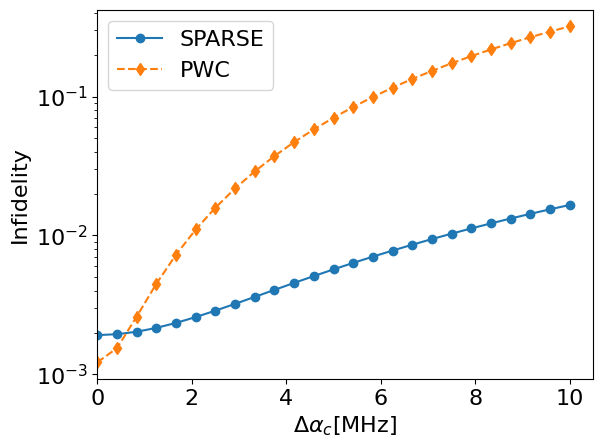

In [47]:
plt.plot(dfreqs / 1e6, 1 - sparse_anhar_fids_c, linestyle='solid', label='SPARSE', marker='o')
plt.plot(dfreqs / 1e6, 1 - pwc_anhar_fids_c, linestyle='dashed', marker='d', label='PWC')

plt.legend()
plt.xlim(0)
plt.semilogy()
plt.xlabel(r'$\Delta \alpha_c$[MHz]')
plt.ylabel('Infidelity')
plt.savefig('perturbed_anhar_c_fid.png', bbox_inches='tight', dpi=500)

All together:

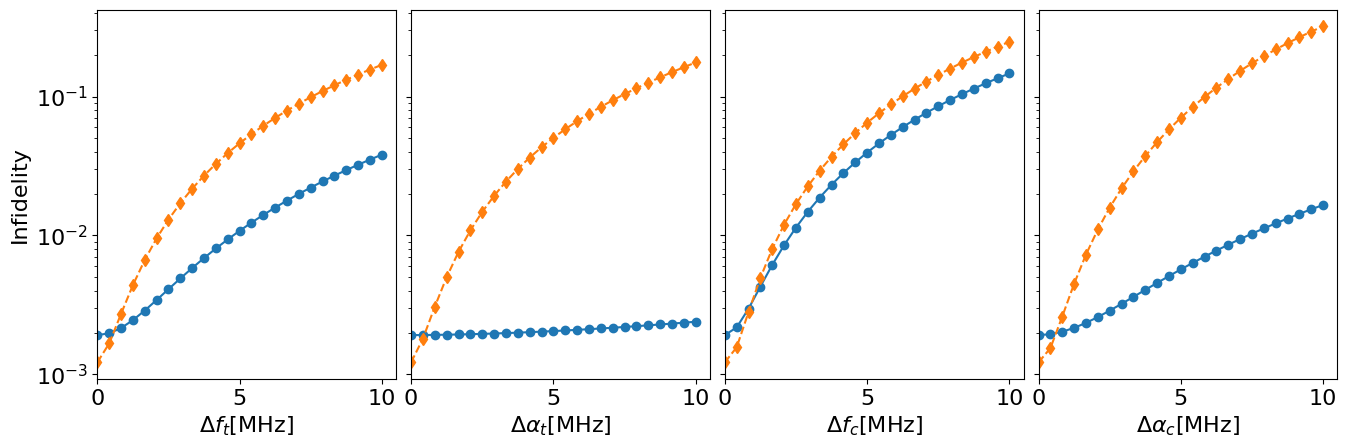

In [65]:
plot_freqs = dfreqs / 1e6

fig, axs = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(16)

plt.subplots_adjust(wspace=0.05)

axs[0].plot(plot_freqs, 1 - sparse_freq_fids_t, linestyle='solid', marker='o')
axs[1].plot(plot_freqs, 1 - sparse_anhar_fids_t, linestyle='solid', marker='o')
axs[2].plot(plot_freqs, 1 - sparse_freq_fids_c, linestyle='solid', marker='o')
axs[3].plot(plot_freqs, 1 - sparse_anhar_fids_c, linestyle='solid', marker='o')

axs[0].plot(plot_freqs, 1 - pwc_freq_fids_t, linestyle='dashed', marker='d')
axs[1].plot(plot_freqs, 1 - pwc_anhar_fids_t, linestyle='dashed', marker='d')
axs[2].plot(plot_freqs, 1 - pwc_freq_fids_c, linestyle='dashed', marker='d')
axs[3].plot(plot_freqs, 1 - pwc_anhar_fids_c, linestyle='dashed', marker='d')

axs[0].set_xlabel('$\Delta f_t$[MHz]')
axs[1].set_xlabel(r'$\Delta \alpha_t$[MHz]')
axs[2].set_xlabel('$\Delta f_c$[MHz]')
axs[3].set_xlabel(r'$\Delta \alpha_c$[MHz]')


for ax in axs:
    ax.semilogy()
    ax.set_xlim(0)

axs[0].set_ylabel('Infidelity')

plt.savefig('all_perts_together.png', bbox_inches='tight', dpi=750)
